<a href="https://colab.research.google.com/github/ashouy/Aprendizado-de-Maquina/blob/main/Atividade02_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base para predição do custo de uma consulta médica

> ## Metadata

* Disponível em: https://www.kaggle.com/sureshmecad/predict-a-doctors-consultation-fee

* O valor da consulta no final está em rúpia indiana IRN

### **Apresentação da base**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 

consultas = pd.read_excel('https://github.com/ashouy/Aprendizado-de-Maquina/blob/main/bases/consultation_fee/train.xlsx?raw=true')
consultas.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


* **Qualification** : Qualificação e graus titulados pelo médico
* **Experience** : Experiência em anos
* **Rating** : Avaliação dos pacientes
* **Profile** : Tipo do médico
* **Miscellaeous_info** : Informação extra dobre o doutor
* **Place** : área da cidade que o médico está localizado
* **Fees** : preço da consulta

### **Tratamento**


In [ ]:
consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


#### Seleção de colunas

In [ ]:
## verificando as colunas que tem valores não definidos
hasNan = consultas.isnull().sum()
print(hasNan)

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


In [ ]:
#removendo Miscellaneous_Info, pois não apresenta um padrão para ajudar na classificação
consultas_sem_misc = consultas.drop(['Miscellaneous_Info'], axis=1)
consultas_sem_misc.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [ ]:
## verificando quantos valores possíveis a coluna "qualificationn tem"
consultas_sem_misc["Qualification"].describe()

count     5961
unique    1420
top        BDS
freq       488
Name: Qualification, dtype: object

>* A coluna Misscellaneous_info não apresenta dados constantes, ou que respeitam algum padrão, impossibilitando de realizar alguma conversão para dado numérico, e dificultando a análize

>* A coluna "rating" tem 3302 dados faltantes, mais da metade do exemplos, não há possibilidade de preencher com médias ou valores fixos como na coluna "place", que tem apenas 25 exemplos com valores não definidos

>* Conclusão: serão removidas as colunas "rating", "miscellaneous_Info" e "Profile"

#### Tratamento

In [ ]:
consultas_valores_tratados = consultas_sem_misc[["Qualification",	"Experience", "Profile", "Place",	"Fees"]]
consultas_valores_tratados.head()

,Qualification,Experience,Profile,Place,Fees
0,"BHMS, MD - Homeopathy",24 years experience,Homeopath,"Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,Ayurveda,"Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,ENT Specialist,"Mathikere - BEL, Bangalore",300
3,"BSc - Zoology, BAMS",12 years experience,Ayurveda,"Bannerghatta Road, Bangalore",250
4,BAMS,20 years experience,Ayurveda,"Keelkattalai, Chennai",250


In [ ]:
consultas_valores_tratados["Experience"] = consultas_valores_tratados["Experience"].str.rstrip(' years experience')
consultas_valores_tratados["Experience"] = pd.to_numeric(consultas_valores_tratados["Experience"])
consultas_valores_tratados1 = consultas_valores_tratados
consultas_valores_tratados1.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Experience,Fees
count,5961.000000,5961.000000
mean,17.303976,307.944640
std,11.142798,190.920373
min,0.000000,5.000000
25%,9.000000,150.000000
50%,14.000000,300.000000
75%,23.000000,500.000000
max,66.000000,950.000000


In [ ]:
consultas_aux = consultas_valores_tratados1[['Qualification', 'Experience', 'Place', 'Profile', 'Fees']]

In [ ]:
consultas_aux.head()

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250


In [ ]:
consultas_aux['Qualification'].head()

0             BHMS, MD - Homeopathy
1      BAMS, MD - Ayurveda Medicine
2    MBBS, MS - Otorhinolaryngology
3               BSc - Zoology, BAMS
4                              BAMS
Name: Qualification, dtype: object

* tratar coluna Qualificação

In [ ]:
## Separa a string da Qualificação por vírgulas
qualificacao = consultas_aux['Qualification'].str.split(',', expand = True)
qualificacao.head()

,0,1,2,3,4,5,6,7,8,9
0,BHMS,MD - Homeopathy,None,None,None,None,None,None,None,None
1,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None,None
2,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None,None
3,BSc - Zoology,BAMS,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None


In [ ]:
## se o nome da coluna 1 for maior que 4, significa que NÃO É A SIGLA DA QUALIFICAÇÃO,
## então é trocado de posição, porque alguns exemplos A SIGLA VEM PRIMEIRO, EM OUTROS VEM EM SEGUNDO
for i in range(qualificacao.shape[0]):
    if len(qualificacao[0][i])>4:
        qualificacao[0][i]=qualificacao[1][i]
    else:
        qualificacao[0][i]=qualificacao[0][i]

In [ ]:
## Separa os casos em que existe um "-" separando a sigla do resto
qualificacao_aux = qualificacao[0].str.split('-', expand=True)

In [ ]:
## coloco a o que tem na primeira coluna da qualificacao_aux (A SIGLA NO FINAL DAS CONTAS) 
consultas_aux['qualificacao'] = qualificacao_aux[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
place = consultas_aux['Place'].str.split(',', expand=True)
consultas_aux['Place1'] = place[1]
## place dividido por virgula, "place[1]" vai retornar o que vem depois da virgula,
## o que vem antes é "place[0]". Pegar apenas o valor da cidade

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


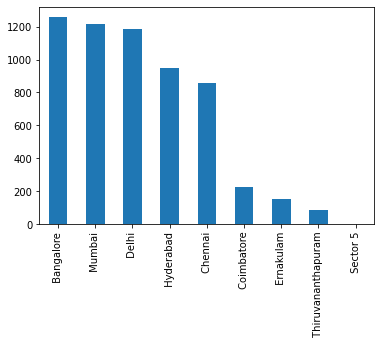

In [ ]:
consultas_aux['Place1'].value_counts().plot(kind='bar')
## como podemos ver, a cidade com mais consultas é bangalore

In [ ]:
## remoção do "Sector-5" pois não existe consultas
consultas_aux = consultas_aux[consultas_aux.Place1 != ' Sector 5']

In [ ]:
consultas_aux1 = consultas_aux

In [ ]:
consultas_aux1['Place1'] = consultas_aux1['Place1'].apply(lambda x: 'Bangalore' if x is None else x)

In [ ]:
consultas_aux1['Place1'] = consultas_aux1['Place1'].apply(lambda x: 'Bangalore' if x is np.nan else x)

In [ ]:
consultas_aux1['Place1'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Bangalore'],
      dtype=object)

In [ ]:
consultas_aux1.head()

,Qualification,Experience,Place,Profile,Fees,qualificacao,Place1
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100,BHMS,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350,BAMS,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,Bangalore
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250,BAMS,Bangalore
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250,BAMS,Chennai


#### adicionando novas colunas tratadas

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_place = LabelEncoder()
le_place.fit(consultas_aux1['Place1'])

LabelEncoder()

In [ ]:
le_place.classes_

array([' Bangalore', ' Chennai', ' Coimbatore', ' Delhi', ' Ernakulam',
       ' Hyderabad', ' Mumbai', ' Thiruvananthapuram', 'Bangalore'],
      dtype=object)

In [ ]:
consultas_aux2 = consultas_aux1

In [ ]:
consultas_aux2['Place1'] = le_place.transform(consultas_aux1['Place1'])

In [ ]:
consultas_aux2.head()

,Qualification,Experience,Place,Profile,Fees,qualificacao,Place1
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100,BHMS,4
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350,BAMS,0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,0
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250,BAMS,0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250,BAMS,1


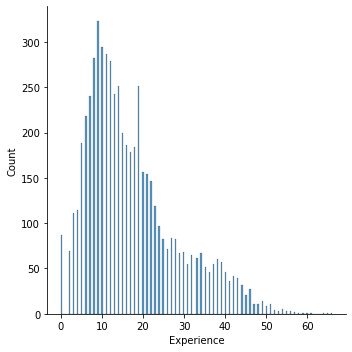

In [ ]:
sns.displot(consultas_aux2, x="Experience", bins=200)
## Visualização da distribuição da experiencia

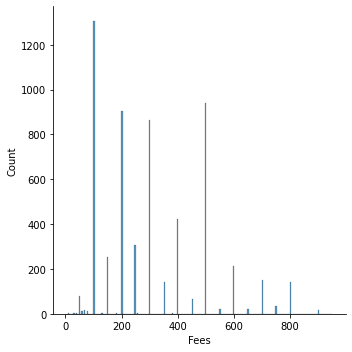

In [ ]:
sns.displot(consultas_aux2, x="Fees", bins=200)
##Vizualizando distribuição dos preços das consultas

In [ ]:
consultas_aux2.head()

,Qualification,Experience,Place,Profile,Fees,qualificacao,Place1
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100,BHMS,4
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350,BAMS,0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,0
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250,BAMS,0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250,BAMS,1


In [ ]:
dummies=pd.get_dummies(consultas_aux2[['Profile']], drop_first=True)

In [ ]:
consultas_aux3 = consultas_aux2.drop(['qualificacao','Qualification','Place', 'Profile'], axis=1)
consultas_aux4 =pd.concat([consultas_aux3, dummies], axis=1, join='inner')
consultas_aux4.head()

,Experience,Fees,Place1,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,4,0,0,0,0,1
1,12,350,0,0,0,0,0,0
2,9,300,0,0,0,1,0,0
3,12,250,0,0,0,0,0,0
4,20,250,1,0,0,0,0,0


In [ ]:

corr = consultas_aux4[['Fees', 'Place1','Profile_Dentist','Profile_Dermatologists',	'Profile_ENT Specialist',	'Profile_General Medicine',	'Profile_Homeopath']].corr()

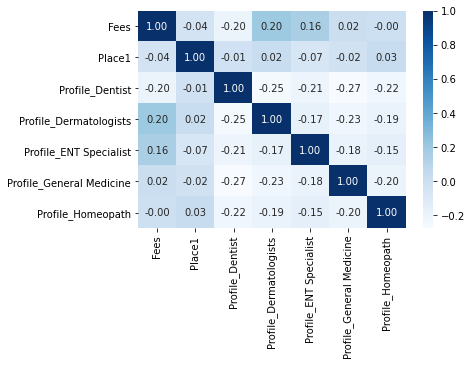

In [ ]:
sns.heatmap(corr, annot=True, fmt='.2f', cmap="Blues")

In [ ]:
consultas_aux4.head()

,Experience,Fees,Place1,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,4,0,0,0,0,1
1,12,350,0,0,0,0,0,0
2,9,300,0,0,0,1,0,0
3,12,250,0,0,0,0,0,0
4,20,250,1,0,0,0,0,0


In [ ]:
x_tr=consultas_aux4.drop(['Fees'], axis=1)
y_tr=consultas_aux4['Fees']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(4768, 7)

In [ ]:
y_train.shape


(4768,)

In [ ]:
y_train= y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
consultas_aux4.to_csv('./consultasTratadasFinal.csv', index = False,)
#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

# Aplicação dos algoritmos

In [ ]:
import pandas as pd

base_tratada = pd.read_csv('https://raw.githubusercontent.com/ashouy/Aprendizado-de-Maquina/main/bases/consultation_fee/consultasTratadasFinal.csv')
base_tratada.head()

,Experience,Fees,Place1,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,4,0,0,0,0,1
1,12,350,0,0,0,0,0,0
2,9,300,0,0,0,1,0,0
3,12,250,0,0,0,0,0,0
4,20,250,1,0,0,0,0,0


## Importações necessárias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Classe runregression

Para executar validação cruzada e obter a média e desvio padrão das métricas (MAE, MSE, RMSE e R2)

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics

class runregression:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: quantidade de folds da validação cruzada

    Guarda as métricas de cada execução em resultados e 
    Mostra os valores médios com desvio padrão para as métricas (mostraresultadomedio)   
  '''

  def __init__(self, X, y, model, cv = 5):
    
    self.__resultados = {
      'MAE': [],
      'MSE': [],
      'RMSE': [],
      'R2': []
    }

    print(f'validação cruzada com {cv} folds')
    self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    kf = KFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in kf.split(X, y):
      model.fit(X.iloc[train_index], y.iloc[train_index])
      pred = model.predict(X.iloc[test_index])
      self.__resultados['MAE'].append(metrics.mean_absolute_error(y[test_index], pred))
      self.__resultados['MSE'].append(metrics.mean_squared_error(y[test_index], pred))
      self.__resultados['RMSE'].append(np.sqrt(metrics.mean_squared_error(y[test_index], pred)))
      self.__resultados['R2'].append(metrics.r2_score(y[test_index], pred))

  def mostraresultadomedio(self):
    print(f"MAE: {np.mean(self.__resultados['MAE']):.2f} +- {np.std(self.__resultados['MAE']):.2f}")
    print(f"MSE: {np.mean(self.__resultados['MSE']):.2f} +- {np.std(self.__resultados['MSE']):.2f}")
    print(f"RMSE: {np.mean(self.__resultados['RMSE']):.2f} +- {np.std(self.__resultados['RMSE']):.2f}")
    print(f"R2: {np.mean(self.__resultados['R2']):.2f} +- {np.std(self.__resultados['R2']):.2f}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], test_size=0.33)


In [ ]:
y_train.shape

(3993,)

In [ ]:
X_train.shape

(3993, 7)

In [ ]:
y_train= y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

cross_validation_RL = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], LinearRegression(), cv = 5)
cross_validation_RL.mostraresultadomedio()

validação cruzada com 5 folds
MAE: 145.65 +- 2.16
MSE: 32713.53 +- 764.57
RMSE: 180.86 +- 2.12
R2: 0.10 +- 0.02


## KNN regressor

Na regressão, o KNN calcula a média dos k vizinhos mais próximos (**média simples ou poderada**) para o novo exemplo


In [ ]:
# cross_validation_RL = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], LinearRegression(), cv = 10)
# cross_validation_RL.mostraresultadomedio()
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid_knn,  cv = 5, verbose = 1) 
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   33.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
gridknn.best_params_

{'n_neighbors': 39, 'p': 1, 'weights': 'uniform'}

## Teste com os melhores parâmetros

In [ ]:
pred = gridknn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 0.7243863049544234
MSE: 0.8216347106834448
RMSE: 0.9064406823854746
R2: 0.16214199328747503


In [ ]:
knn = gridknn.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_knn = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], knn, cv = 10)
cross_validation_knn.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 144.28 +- 4.05
MSE: 32616.47 +- 1920.81
RMSE: 180.52 +- 5.36
R2: 0.10 +- 0.02


## SVM regressor

Na regressão, o SVM busca pelo hiperplano que se ajuste aos dados, tentando maximizar a margem, **evitando que o modelo fique superajustado aos dados de treino**

#### Escolha dos melhores parâmetros com GridSearchCV


In [ ]:
from sklearn.svm import SVR

param_grid_svm = {
    'C': [1, 10, 100], 
    'gamma': ['auto', 'scale'], 
    'kernel': ['rbf', 'sigmoid']
} 
gridsvm = GridSearchCV(SVR(),param_grid_svm, verbose = 3)
gridsvm.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=auto, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.089, total=   0.8s
[CV] C=1, gamma=auto, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.114, total=   0.8s
[CV] C=1, gamma=auto, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.077, total=   0.8s
[CV] C=1, gamma=auto, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.081, total=   0.8s
[CV] C=1, gamma=auto, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.100, total=   0.8s
[CV] C=1, gamma=auto, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1, gamma=auto, kernel=sigmoid, score=-751.427, total=   1.3s
[CV] C=1, gamma=auto, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1, gamma=auto, kernel=sigmoid, score=-696.440, total=   1.3s
[CV] C=1, gamma=auto, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1, gamma=auto, kernel=sigmoid, score=-762.609, total=   1.3s
[CV] C=1, gamma=auto, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1, gamma=auto, kernel=sigmoid, score=-813.143, total=   1.2s
[CV] C=1, gamma=auto, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1, gamma=auto, kernel=sigmoid, score=-827.131, total=   1.3s
[CV] C=1, gamma=scale, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.089, total=   0.8s
[CV] C=1, gamma=scale, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.114, total=   0.8s
[CV] C=1, gamma=scale, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.077, total=   0.8s
[CV] C=1, gamma=scale, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.082, total=   0.8s
[CV] C=1, gamma=scale, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.100, total=   0.8s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1, gamma=scale, kernel=sigmoid, score=-742.297, total=   1.3s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1, gamma=scale, kernel=sigmoid, score=-688.846, total=   1.3s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1, gamma=scale, kernel=sigmoid, score=-777.157, total=   1.3s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1, gamma=scale, kernel=sigmoid, score=-829.730, total=   1.3s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1, gamma=scale, kernel=sigmoid, score=-828.719, total=   1.3s
[CV] C=10, gamma=auto, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.072, total=   1.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.104, total=   1.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.070, total=   1.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.081, total=   1.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.101, total=   0.9s
[CV] C=10, gamma=auto, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=auto, kernel=sigmoid, score=-75502.105, total=   1.3s
[CV] C=10, gamma=auto, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=auto, kernel=sigmoid, score=-69565.884, total=   1.3s
[CV] C=10, gamma=auto, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=auto, kernel=sigmoid, score=-75168.387, total=   1.4s
[CV] C=10, gamma=auto, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=auto, kernel=sigmoid, score=-87635.848, total=   1.3s
[CV] C=10, gamma=auto, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=auto, kernel=sigmoid, score=-82490.298, total=   1.3s
[CV] C=10, gamma=scale, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.072, total=   1.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.104, total=   1.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.070, total=   1.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.081, total=   1.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.101, total=   1.0s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=scale, kernel=sigmoid, score=-74595.153, total=   1.3s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=scale, kernel=sigmoid, score=-72186.104, total=   1.3s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=scale, kernel=sigmoid, score=-75201.852, total=   1.4s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=scale, kernel=sigmoid, score=-80885.552, total=   1.3s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=scale, kernel=sigmoid, score=-83026.444, total=   1.3s
[CV] C=100, gamma=auto, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=auto, kernel=rbf, score=0.063, total=   1.9s
[CV] C=100, gamma=auto, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=auto, kernel=rbf, score=0.089, total=   1.9s
[CV] C=100, gamma=auto, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=auto, kernel=rbf, score=0.057, total=   1.8s
[CV] C=100, gamma=auto, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=auto, kernel=rbf, score=0.088, total=   1.8s
[CV] C=100, gamma=auto, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=auto, kernel=rbf, score=0.072, total=   1.9s
[CV] C=100, gamma=auto, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=sigmoid, score=-7565505.430, total=   1.2s
[CV] C=100, gamma=auto, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=sigmoid, score=-6948107.523, total=   1.2s
[CV] C=100, gamma=auto, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=sigmoid, score=-7652461.906, total=   1.4s
[CV] C=100, gamma=auto, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=sigmoid, score=-8279325.385, total=   1.2s
[CV] C=100, gamma=auto, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=sigmoid, score=-8220896.488, total=   1.2s
[CV] C=100, gamma=scale, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=scale, kernel=rbf, score=0.063, total=   1.9s
[CV] C=100, gamma=scale, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=scale, kernel=rbf, score=0.089, total=   1.8s
[CV] C=100, gamma=scale, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=scale, kernel=rbf, score=0.057, total=   1.7s
[CV] C=100, gamma=scale, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=scale, kernel=rbf, score=0.088, total=   1.9s
[CV] C=100, gamma=scale, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=scale, kernel=rbf, score=0.072, total=   1.9s
[CV] C=100, gamma=scale, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=sigmoid, score=-7507137.927, total=   1.3s
[CV] C=100, gamma=scale, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=sigmoid, score=-6873976.680, total=   1.2s
[CV] C=100, gamma=scale, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=sigmoid, score=-7717345.833, total=   1.4s
[CV] C=100, gamma=scale, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=sigmoid, score=-8088159.357, total=   1.2s
[CV] C=100, gamma=scale, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=sigmoid, score=-8275775.243, total=   1.2s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
gridsvm.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

### Escolha do melhores parâmetros para o SVM

In [ ]:
pred = gridsvm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 0.7168610459689294
MSE: 0.8826694393122899
RMSE: 0.939504890520688
R2: 0.099902125126761


### Validação Cruzada com runregression para o SVM

In [ ]:
svm = gridsvm.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_svm = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], svm, cv = 10)
cross_validation_svm.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 152.47 +- 4.20
MSE: 36717.27 +- 2342.75
RMSE: 191.52 +- 6.12
R2: -0.01 +- 0.01


## MLP regressor

### Escolha dos melhores parâmetros com GridSearchCV


In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(100, ), (13,)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [5000, 10000]
}

gridmlp = GridSearchCV(MLPRegressor(),param_grid_mlp, verbose = 1)
gridmlp.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multila

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity', '

### Teste com os melhores parâmetros




In [ ]:
pred = gridmlp.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 0.7274658295935517
MSE: 0.8313877134119791
RMSE: 0.91180464651809
R2: 0.15219641611146406


### Validação Cruzada com runregression para o MLP

In [ ]:
mlp = gridmlp.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_mlp = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], mlp, cv = 10)
cross_validation_mlp.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 142.99 +- 4.12
MSE: 31630.31 +- 2145.60
RMSE: 177.74 +- 6.09
R2: 0.13 +- 0.03


#Conclusão

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

predictedCV = cross_val_predict(LinearRegression(),X_train,y_train, cv=10)

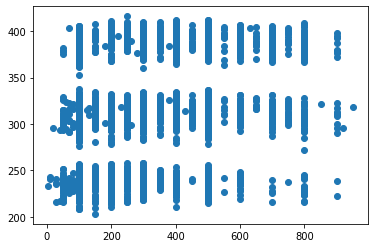

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(base_tratada['Fees'], predictedCV)